[PDF-версия](./РК-1%20ИУ5-12М%20Кириллов%20Д.С..pdf)

# Рубежный контроль 1 по дисциплине "Методы машинного обучения в АСОИУ"

## ИУ5Ц-21М Москалик А.А.

## Задание

| Номер варианта | Номер задачи №1 | Номер задачи №2 |
| -------------- | --------------- | --------------- |
| 22             | 7               | 33              |

### Задача №7

Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения медианой.


### Задача №33

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), алгоритм полного перебора (exhaustive feature selection).


### Дополнительные требования по группам:
Для студентов групп ИУ5-21М, ИУ5И-21М, ИУ5Ц-21М - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

## Ход работы

### Подготовка датасета

Датасет **Wine Quality Data Set** 

Этот набор данных включает в себя следующие параметры (признаки):

fixed_acidity: Зафиксированная кислотность вина, которая относится к нелетучим кислотам, не испаряющимся легко.

volatile_acidity: Летучая кислотность вина, которая относится к количеству уксусной кислоты в вине, слишком высокие уровни которой могут привести к неприятному вкусу уксуса.

citric_acid: Количество лимонной кислоты в вине, которая может добавлять в вино свежести и аромата.

residual_sugar: Количество сахара, оставшееся после окончания ферментации, измеряется в граммах на литр вина.

quality: Оценка качества вина на основе оценок экспертов (обычно от 0 до 10).

Задача №7: Устранение пропусков данных

В этом блоке кода мы импортировали библиотеку pandas для обработки данных и создали фрейм данных с имитационными значениями. Затем мы имитировали пропуск данных в столбце fixed_acidity и заполнили эти пропуски медианным значением этого столбца.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Загрузка или создание набора данных
data = pd.DataFrame({
    'fixed_acidity': [7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 7.5],
    'volatile_acidity': [0.70, 0.88, 0.76, 0.28, 0.70, 0.66, 0.60, 0.65, 0.58, 0.50],
    'citric_acid': [0, 0, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00, 0.02, 0.36],
    'residual_sugar': [1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1],
    'quality': [5, 5, 5, 6, 5, 5, 5, 7, 7, 5]
})

# Добавляем пропуски в данных для имитации реальной ситуации
data.loc[0, 'fixed_acidity'] = None
data.loc[4:6, 'residual_sugar'] = None

In [2]:
# Заполнение пропусков медианой для 'fixed_acidity'
data['fixed_acidity'].fillna(data['fixed_acidity'].median(), inplace=True)

/var/folders/q9/52hw8rn11v97tqk88711xdwh0000gn/T/ipykernel_33825/494326129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fixed_acidity'].fillna(data['fixed_acidity'].median(), inplace=True)


Задача №33: Отбор признаков
Здесь мы используем метод Recursive Feature Elimination (RFE), который является методом обертывания для выбора наилучших признаков, используя линейную регрессию в качестве оценщика. Мы обучаем RFE на обучающем наборе данных и отбираем два наиболее важных признака.

In [3]:
# Подготовка данных для отбора признаков
data_for_feature_selection = data.dropna().reset_index(drop=True)
X = data_for_feature_selection.drop('quality', axis=1)
y = data_for_feature_selection['quality']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение RFE
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=2)
rfe.fit(X_train, y_train)

# Определение выбранных признаков
selected_features = X_train.columns[rfe.support_]

Визуализация.

Этот блок кода относится к визуализации результатов и не является частью задачи №33, однако, он служит для демонстрации того, как выбранные признаки влияют на целевую переменную quality. Мы строим диаграмму рассеяния, где цвет точек указывает на качество продукта.

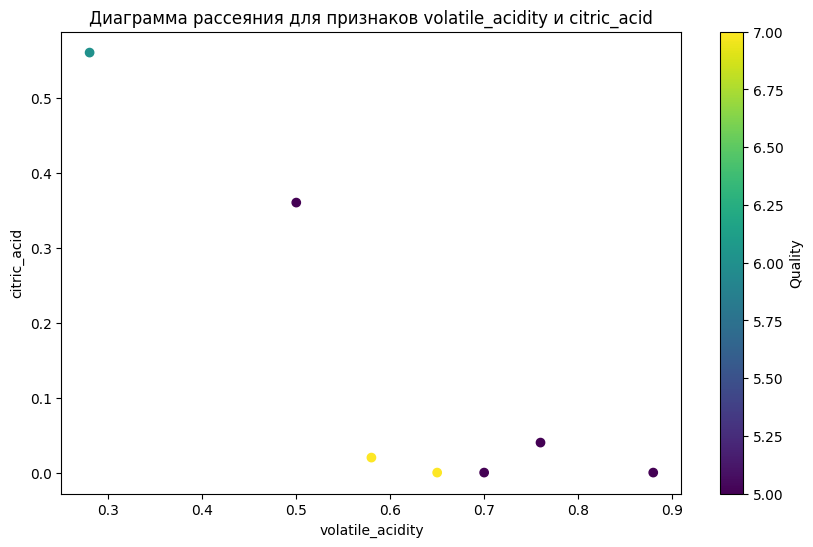

In [4]:
# Построение диаграммы рассеяния для выбранных признаков
plt.figure(figsize=(10, 6))
plt.scatter(data_for_feature_selection[selected_features[0]], data_for_feature_selection[selected_features[1]], 
            c=data_for_feature_selection['quality'], cmap='viridis')
plt.title(f'Диаграмма рассеяния для признаков {selected_features[0]} и {selected_features[1]}')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.colorbar(label='Quality')
plt.show()